<h1><center>PHYS-F-302</center></h1>
<h1><center>Partie numérique</center></h1>
<h2><center>Cédric SCHOONEN, Maxime JAMOTTE</center></h2>

Dans ce notebook, nous résolverons le problème donné à l'adresse https://github.com/bknaepen/MATHF314_2017/ dans le dossier Stokes. Le problème consiste à résoudre l'équation $\Delta^2\psi=0$ par la méthode du "gradient conjugé".

## Justification physique des conditions aux bords

Commençons par donner une justification physique au choix des conditions aux bords utilisé dans l'énoncé.

Traitons d'abord les conditions placées sur les dérivées de la stream function $\psi$. Celles-ci sont listées ci-dessous:

| $\partial_x \psi = 0$ | $\partial_y \psi = 1$ | $\partial_x \psi = 0$ | $\partial_y \psi = 0$ |
|-----------------------|-----------------------|-----------------------|-----------------------|
| bord immobile // y    | bord mobile // x      | bord immobile // y    | bord immobile // x    |

Notre argument pour justifier ces conditions est que le fluide ne "glisse" pas sur les parois de la cavité, i.e. La composante tangentielle à la paroi de la vitesse relative entre le fluide et le bord en question est nulle près du bord. Cet argument s'appuie sur l'existence de forces intermoléculaires entre les molécules de fluide et de la paroi, d'aspérités sur la paroi ainsi que sur la nature fluidique du fluide concerné. La logique est qu'à la fois les forces intermoléculaires et les aspérités du bord vont avoir tendance à retenir les molécules de fluide proches de la paroi immobiles par rapport à cette dernière. La fluidité du fluide va rendre cette immobilisation possible car les molécules de fluide plus éloignées de la paroi vont simplement "rouler" sur les molécules plus proches sans les emporter totalement avec elles. En pratique, cela implique que la vitesse tangentielle du fluide au plus proche des bords est la même que la vitesse de la paroi. Par example, la vitesse tangentielle près du bord mobile de vitesse $1$ sera $u=1$. Sachant que $ u = \partial_y\psi$ et $v = -\partial_x\psi$, nous avons bien dans notre cas $\partial_y\psi = u = 1$.

La condition sur $\psi$, fixée à $0$ sur tout le périmètre de la cavité, se justifie quant à elle par un autre argument. Cet argument repose sur l'imperméabilé de la paroi. En effet, si les molécules ne peuvent traverser les bords, il est nécessaire que leur vitesse normale s'annule au plus près de ces bords. Se rappelant de la relation entre $u,v$ et les dérivées de $\psi$, nous voyons que cela implique que la dérivée de $\psi$ dans la direction tangentielle à un bord est nulle sur ce bord. Par la continuité de $\psi$ dans la cavité, nous avons donc que $\psi$ prend la même valeur sur tout le périmètre de cette cavité. Comme seules les dérivées de $\psi$ ont un sens physique, nous pouvons librement choisir de fixer cette valeur à $0$.

Nous avons donc vérifié que les conditions aux bords qui ont été choisies décrivent bien la situation physique attendue.

## Discrétisation de l'opérateur bilaplacien

Le bilaplacien de $\psi$ à discrétiser s'écrit comme $\Delta^2\psi = \partial_{xxxx}\psi + 2\partial_{xxyy}\psi + \partial_{yyyy}\psi$ en supposant $\psi$ suffisamment régulière.

Nous pouvons exprimer les dérivées d'ordre 2 et 4 dans les directions $x,y$ de la façon suivante:

$$ \partial_{xx}\psi_{i,j} = \frac{ \psi_{i,j+1} -2 \psi_{i,j} + \psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

$$ \partial_{yy}\psi_{i,j} = \frac{ \psi_{i-1,j} -2 \psi_{i,j} + \psi_{i+1,j} }{ (dy)^2 } + \cal O((dy)^2) $$

$$ \partial_{xxxx}\psi_{i,j} = \frac{ \psi_{i,j+2} -4 \psi_{i,j+1} +6 \psi_{i,j} -4\psi_{i,j-1} + \psi_{i,j-2} }{ (dx)^4 } + \cal O((dx)^2) $$

$$ \partial_{yyyy}\psi_{i,j} = \frac{ \psi_{i-2,j} -4 \psi_{i-1,j} +6 \psi_{i,j} -4\psi_{i+1,j} + \psi_{i+2,j} }{ (dy)^4 } + \cal O((dy)^2) $$

Les discrétisations des dérivées secondes sont utiles pour trouver celle de la dérivée croisée $\partial_{xxyy}\psi$:

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \partial_{yy}\psi_{i,j+1} -2 \partial_{yy}\psi_{i,j} + \partial_{yy}\psi_{i,j-1} }{ (dx)^2 } + \cal O((dx)^2) $$

En remplaçant, cela donne

$$ \partial_{xxyy}\psi_{i,j} = \frac{ \frac{\psi_{i-1,j+1} -2 \psi_{i,j+1} + \psi_{i+1,j+1}}{(dy)^2} + \cal O((dy)^2)
                                    -2\frac{\psi_{i-1,j  } -2 \psi_{i,j  } + \psi_{i+1,j  }}{(dy)^2} + \cal O((dy)^2)
                                    + \frac{\psi_{i-1,j-1} -2 \psi_{i,j-1} + \psi_{i+1,j-1}}{(dy)^2} + \cal O((dy)^2)
                                    }{(dx)^2} + \cal O((dx)^2) $$
$$ \partial_{xxyy}\psi_{i,j} = \frac{\psi_{i-1,j+1}  -2 \psi_{i,j+1} +  \psi_{i+1,j+1}
                                     -2 \psi_{i-1,j} +4 \psi_{i-1,j} -2 \psi_{i+1,j}
                                     \psi_{i-1,j-1}  -2 \psi_{i,j-1} +  \psi_{i+1,j-1}
                                     }{(dx)^2(dy)^2} + \cal O((dx)^2) + \cal O((dy)^2) + \cal O\left(\frac{(dx)^4}{(dy)^2}\right) $$       
                                     
Les coefficients sont plus facilement visualisés dans le tableau suivant:

|     || j-1 |  j  | j+1 |
|-----||-----|-----|-----|
| i-1 ||  1  | -2  |  1  |
|  i  || -2  |  4  | -2  |
| i+1 ||  1  | -2  |  1  |

Notons qu'il est laborieux de montrer que les termes en $\cal O((dx)^2)$ du numérateur se simplifient pour donner une erreur en $\cal O\left(\frac{(dx)^4}{(dy)^2}\right)$. De plus, cette preuve nous semble dénuée d'intérêt pour le sujet c'est pourquoi nous ne l'écrirons pas ici. Cependant, l'ayant faite, nous sommes interrogeables sur le sujet.

Les coefficients pour le bilaplacien se résument donc *dans le cas où $dx$ = $dy$* par:

|     || j-2 | j-1 |  j  | j+1 | j+2 |
|-----||-----|-----|-----|-----|-----|
| i-2 ||     |     |  1  |     |     |
| i-1 ||     |  2  | -8  |  2  |     |
|  i  ||  1  | -8  | 20  | -8  |  1  |
| i+1 ||     |  2  | -8  |  2  |     |
| i+2 ||     |     |  1  |     |     |

## Discrétisation des conditions aux bords

Nous avons deux conditions aux bords à discrétiser. La première est $\psi = 0$, que nous implémentons de manière évidente et correcte à tous les ordres comme 

$$\psi_{i,0} = \psi_{i,N-1} = \psi_{0,j} = \psi_{N-1,j} = 0 \quad \forall i,j=0,...,N-1$$

La deuxième condition aux bords est portée sur les dérivées de $\psi$ et prend des expressions différentes suivant le bord en question. La condition sur le bord situé en $x=0$ est $\partial_x\psi = 0$. Nous la discrétisons en considérant une approximation à l'ordre 1 de type forward de la dérivée en $x=0$:

$$ 0 = \partial_x\psi_{i,0} = \frac{-\frac 32\psi_{i,0} + 2\psi_{i,1} -\frac 12\psi_{i,2}}{dx} + \mathcal O((dx)^2) $$
$$ \psi_{i,1} = \frac 34 \psi_{i,0} + \frac 14 \psi_{i,2} + \mathcal O((dx)^3) = \frac 14 \psi_{i,2} + \mathcal O((dx)^3) $$

Il est facile de voir que ce raisonnement se généralise à tous les côtés. Nous détaillons encore le côté supérieur pour lequel la condition est légèrement différente.

$$ 1 = \partial_y\psi_{N-1,j} = \frac{\frac 32\psi_{N-1,j} - 2\psi_{N-2,j} +\frac 12 \psi_{N-3,j}}{dy} + \mathcal O((dy)^2) $$
$$ \psi_{N-2,j} = -\frac 12 dy + \frac 34 \psi_{N-1,j} + \frac 14 \psi_{N-3,j} + \mathcal O((dx)^3) = -\frac 12 dy + \frac 14 \psi_{N-3,j} + \mathcal O((dx)^3) $$

Nos conditions sur les dérivées se résument donc de la façon suivante:

$$ \psi_{i,1} = \frac 14 \psi_{i,2} + \cal O((dx)^3) $$
$$ \psi_{i,N-2}        = \frac 14 \psi_{i,N-3} + \cal O((dx)^3) $$
$$ \psi_{1,j}        =  \frac 14 \psi_{2,j} + \cal O((dy)^3) $$
$$ \qquad \ \  \psi_{N-2,j} = -\frac 12 dy + \frac 14 \psi_{N-3,j} + \mathcal O((dy)^3) $$

Remarquons que l'imposition des conditions aux bords est incohérentes pour les 2 points $(N-2,1)$ et $(N-2,N-2)$ situés près des coins. En effet, ceux-ci se retrouvent deux fois dans les formules ci-dessus et se voient imposées deux valeurs différentes. Ceci amène un choix arbitraire dans notre code concernant la valeur à utiliser. Cependant, ceci n'est pas un problème physique car dans la limite $N\rightarrow \infty$, $dy\rightarrow 0$ et les deux valeurs coïncident. Il nous a donc semblé plus naturel d'imposer directement la valeur la plus proche de  $0$, c'est à dire la condition donnée pour le bord parallèle à l'axe $y$.

## Implémentation de la méthode du gradient conjugé

In [1]:
import time
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import pyplot, cm

Nous implémentons maintenant le bilaplacien discrétisé plus haut. Comme les conditions aux bords fixent les valeurs pour les deux rangées de points extérieurs, nous ne calculons le bilaplacien que dans un carré centré de taille $(N-4)\times (N-4)$. Les conditions aux bords sont implémentées dans l'opérateur lui-même, via le champ $p$ à partir duquel il est calculé.

In [2]:
def impose_bc(p0,dy):
    
    p = p0.copy()
    
    p[:,0]  = 0
    p[:,-1] = 0
    p[0,:]  = 0
    p[-1,:] = 0
    
    p[2:-2,1]  = 1/4*p0[2:-2,2]
    p[2:-2,-2] = 1/4*p0[2:-2,-3]
    p[1,2:-2]  = 1/4*p0[2,2:-2]    
    p[-2,2:-2] = 1/4*p0[-3,2:-2] 
    
    p[1,1] = p0[2,2]/16
    p[1,-2] = p0[2,-3]/16
    p[-2,1] = p0[-3,2]/16
    p[-2,-2] = p0[-3,-3]/16
    
    return p

In [3]:
def bilaplacian(p,dx):
    
    N = p.shape[0]
    Ap = numpy.zeros((N,N))
    
    Ap[2:-2,2:-2] = 20*p[2:-2,2:-2]-8*(p[1:-3,2:-2]+p[2:-2,1:-3]+p[2:-2,3:-1]+p[3:-1,2:-2])+\
                    2*(p[1:-3,1:-3]+p[1:-3,3:-1]+p[3:-1,1:-3]+p[3:-1,3:-1])+\
                    1*(p[:-4,2:-2]+p[2:-2,:-4]+p[2:-2,4:]+p[4:,2:-2])
   
    return Ap/dx**4

In [4]:
def bilaplacian_bc(p0,dx):   # Bilaplacien modifié par les conditions aux bords
        
    p = impose_bc(p0,dx)
    
    N = p.shape[0]
    Ap = numpy.zeros((N,N))
    
    Ap[2:-2,2:-2] = 20*p[2:-2,2:-2]-8*(p[1:-3,2:-2]+p[2:-2,1:-3]+p[2:-2,3:-1]+p[3:-1,2:-2])+\
                    2*(p[1:-3,1:-3]+p[1:-3,3:-1]+p[3:-1,1:-3]+p[3:-1,3:-1])+\
                    1*(p[:-4,2:-2]+p[2:-2,:-4]+p[2:-2,4:]+p[4:,2:-2])
   
    return Ap/dx**4

Nous récupérons et adaptons le code du mooc à notre problème.

In [5]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [6]:
def conjugate_gradient_2d(p, b, dx, l1_target):
    '''Performs cg relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing (same in both directions)
    l1_target: float
        exit criterion
        
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    N = p.shape[0]
    r  = numpy.zeros((N,N)) 
    Ad  = numpy.zeros((N,N)) 
    
    l1_norm = 1
    iterations = 0
    l1_conv = []
    
    r = (b-bilaplacian_bc(p,dx))
    d = r.copy()
    rho = numpy.sum(r*r)
    Ad = bilaplacian_bc(d,dx)
    sigma = numpy.sum(d*Ad)
    
    while l1_norm > l1_target:

        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma

        p = pk + alpha*dk
        r = rk - alpha*Ad
        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
        rho = rhop1
        
        d = r + beta*dk
        Ad = bilaplacian_bc(d,dx)
        sigma = numpy.sum(d*Ad)
    
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Number of CG iterations: {0:d}'.format(iterations))
    return p, l1_conv   

## Calcul de la stream function qui respecte $\Delta^2\psi=0$

Etant donné que nos conditions aux bords possèdent des termes homogène ($1/4$ de la ligne d'à côté) et un terme inhomogène ($-dy/2$), nous séparons la stream function en une partie $\psi'$ obéissant aux conditions aux bords homogènes et une partie $\psi''$, constante, contenant le terme indépendant. Le problème se scinde alors en deux parties et se résume à résoudre un problème avec un terme de source et des conditions homogènes uniquement:

$$ 0 = \Delta^2\psi = \Delta^2\psi' + \Delta^2\psi'' \qquad \psi = \psi'+\psi'' $$

$$ b' = \Delta^2\psi' \qquad b' = -\Delta^2\psi'' $$

Nous utilisons les paramètres (taille de grille, dimensions spatiales, précision désirée) imposées dans l'énoncé. 

In [44]:
# paramètres
N = 41
L = 1
l1_target = 1e-8

dx = L/(N-1)

# initialisation -> on peut choisir ce qu'on veut
pi = numpy.ones((N,N))

# terme indépendant dans les conditions aux bords
pii = numpy.zeros((N,N))
pii[-2,2:-2] = -dx/2

# résolution par gradient conjugué sur le centre (N-4)x(N-4) et écrit les valeurs au bord encore sur la réponse finale
pi, l1_conv = conjugate_gradient_2d(pi, -bilaplacian(pii,dx), dx, l1_target)
p = impose_bc(pi,dx) + pii

Number of CG iterations: 1934


Remarquons que la méthode ne converge pas en moins de $nx\times ny = 41\times 41 = 1681$ itérations, comme prévu pour la méthode du gradient conjugé selon le mooc. Cette méthode ne semble pas fonctionner pour cet opérateur, probablement pour des raisons de symétrie de l'opérateur.

Nous affichons ci-dessous la solution $\psi$ calculée. Pour mieux visualiser les mouvements de fluides apparaissant dans notre système, nous affichons aussi le champ de vitesse à l'intérieur de la cavité.

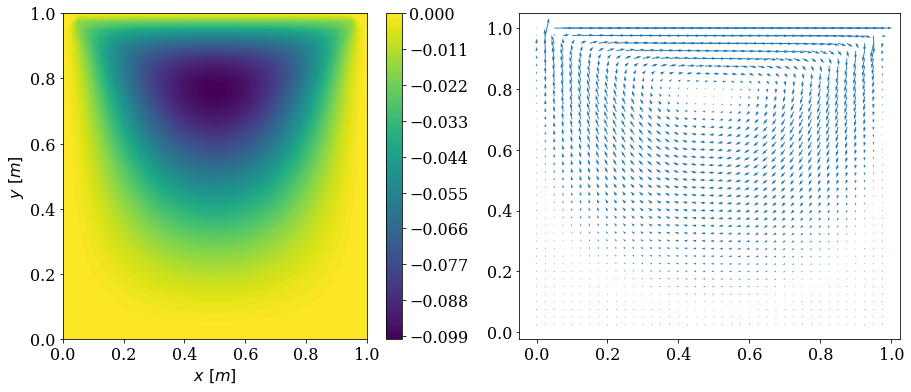

In [43]:
x = numpy.linspace(0,L,N)
y = numpy.linspace(0,L,N)

pyplot.figure(figsize=(15,6))
pyplot.subplot(121)
pyplot.contourf(x,y,p,100,cmap=cm.viridis)
pyplot.xlabel('$x\ [m]$')
pyplot.ylabel('$y\ [m]$')
pyplot.colorbar();

dy = dx
x = numpy.linspace(0,L-dx,N-1)
y = numpy.linspace(dy,L,N-1)
vx = numpy.zeros((N-1,N-1))
vy = numpy.zeros((N-1,N-1))

vx =  (p[1:,:-1] - p[:-1,:-1])/dy
vy = -(p[1:,1:] - p[1:,:-1])/dx

pyplot.subplot(122)
pyplot.quiver(x,y,vx,vy,color='C0');

Nous remarquons plusieurs choses sur les images ci-dessus. Le schéma de gauche semble correspondre à ce qui a été suggéré dans les énoncés comme solution finale. Nous notons en plus du côté où la dérivée $\frac{\partial \phi}{\partial y} = 1$ une plus forte variation de couleur que partout ailleurs dans l'image. Ceci permet de comprendre que la vitesse selon $O_x$ est plus élevée qu'aux autres endroits du système. La figure de droite permet de connaître l'intensité et la direction des vecteurs de vitesse en chaque noeud de la grille du système. Les vitesses correspondent bien à ce à quoi nous nous attendions, c'est-à-dire une rotation du fluide dans la cellule, entraînée par le mouvement du côté supérieur. Le sens de rotation correspond également à nos attentes, le côté supérieur se déplaçant vers la droite.

Par ailleurs, nous voyons que les conditions aux bords sur $\phi$ et sur ses dérivées en $x$ et $y$ sont respectées; tout est bien égal à zéro le long des bords et les dérivées semblent s'annuler le long de ceux-ci outre le long du bord supérieur (nous constatons cela grâce à la coloration et la légende). Pour plus de détail, nous avons affiché ci-dessous les valeurs de la matrice dans les coins.

In [9]:
print(p[-5:,:5])
print(p[-5:,-5:])

[[ 0.         -0.0029987  -0.0119948  -0.0220116  -0.03111516]
 [ 0.         -0.00360854 -0.01443416 -0.02405035 -0.03158994]
 [ 0.         -0.00428607 -0.01714427 -0.02429203 -0.02889959]
 [ 0.         -0.00107152 -0.01678607 -0.01857301 -0.0197249 ]
 [ 0.          0.          0.          0.          0.        ]]
[[-0.03111516 -0.0220116  -0.0119948  -0.0029987   0.        ]
 [-0.03158994 -0.02405035 -0.01443416 -0.00360854  0.        ]
 [-0.02889959 -0.02429203 -0.01714427 -0.00428607  0.        ]
 [-0.0197249  -0.01857301 -0.01678607 -0.00107152  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


Affichons maintenant le bilaplacien de notre solution pour vérifier qu'il est bien nul. Selon notre critère de sortie, la somme des valeurs absolues des différences entre les valeurs de $\psi_{ij}$ de l'avant dernière à la dernière itération doit être inférieure à $10^{-8}$. Comme il y a environ 1000 points sur notre grille, nous déduisons que nous connaissons les valeurs $\psi_{ij}$ avec une erreur de l'ordre $10^{-11}$. Les coefficients de la discrétisation centrée du bilaplacien n'étant pas très grand, il s'agit là de l'ordre de grandeur de la différence en un point entre le bilaplacien de notre solution $\psi$ et sa valeur théorique devant être 0. C'est effectivement ce que nous observons:

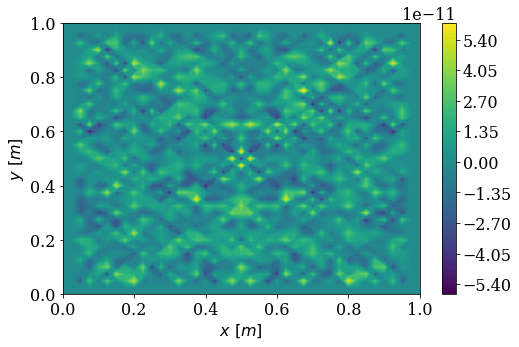

In [10]:
Ap = bilaplacian(p,dx)

x = numpy.linspace(0,L,N)
y = numpy.linspace(0,L,N)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,Ap*dx**4,100,cmap=cm.viridis)
pyplot.xlabel('$x\ [m]$')
pyplot.ylabel('$y\ [m]$')
pyplot.colorbar();

## Valeurs de la stream function aux positions demandées

Nous commençons par définir une fonction nous permettant d'extraire la valeur de la stream function à partir des coordonnées cartésiennes. Nous extrayons ensuite les valeurs demandées.

In [11]:
def p_at_coordinates(p,x,y):
    
    N = p.shape[0]
    i = int(y*(N-1))
    j = int(x*(N-1))
    #print("coordinates i={:d} j={:d}".format(i,j))
    
    return p[i,j]

In [12]:
pij = p_at_coordinates(p,0.6,0.2)
print("La valeur en x=0.6 et y=0.2 est:",pij)

pij = p_at_coordinates(p,0.6,0.4)
print("La valeur en x=0.6 et y=0.4 est:",pij)

pij = p_at_coordinates(p,0.6,0.6)
print("La valeur en x=0.6 et y=0.6 est:",pij)

pij = p_at_coordinates(p,0.6,0.8)
print("La valeur en x=0.6 et y=0.8 est:",pij)

La valeur en x=0.6 et y=0.2 est: -0.0100311404535
La valeur en x=0.6 et y=0.4 est: -0.0361479127899
La valeur en x=0.6 et y=0.6 est: -0.0738291534034
La valeur en x=0.6 et y=0.8 est: -0.0945277936604


Nous affichons également les valeurs minimales et maximales que prend $\psi$ dans notre cavité.

In [13]:
min_p = numpy.min(p)
print(min_p)
max_p = numpy.max(p)
print(max_p)

-0.0999268031073
0.0


## Ordre de convergence

Nous tenons à vérifier l'ordre de convergence de la méthode implémentée, qui devrait être du second ordre.

In [14]:
nx_values = [11,21,31,41,61,81]
l1_target = 1e-4
L = 1

dx = numpy.zeros(len(nx_values))
for i in range(len(dx)):
    dx[i] = L/(nx_values[i]-1)

In [15]:
error = numpy.empty(len(nx_values)-1)
p_centre = numpy.empty(len(nx_values))

for i, nx in enumerate(nx_values):
    
    print("Currently at nx =", nx_values[i])
    start = time.time()
    pi = numpy.ones((nx,nx))
    pii = numpy.zeros((nx,nx))
    pii[-2,2:-2] = -dx[i]/2
    pi, l1_conv = conjugate_gradient_2d(pi, -bilaplacian(pii,dx[i]), dx[i], l1_target)
    p = impose_bc(pi,dx[i]) + pii
    p_centre[i] = p[int(nx/2),int(nx/2)]
    print("Execution time =",time.time(),"seconds")

for i, nx in enumerate(nx_values[:-1]):
    error[i] = numpy.abs(p_centre[i]-p_centre[-1])

Currently at nx = 11
Number of CG iterations: 63
Execution time = 1526630429.3407965 seconds
Currently at nx = 21
Number of CG iterations: 269
Execution time = 1526630429.366669 seconds
Currently at nx = 31
Number of CG iterations: 588
Execution time = 1526630429.434395 seconds
Currently at nx = 41
Number of CG iterations: 1048
Execution time = 1526630429.6205714 seconds
Currently at nx = 61
Number of CG iterations: 1873
Execution time = 1526630430.074135 seconds
Currently at nx = 81
Number of CG iterations: 3057
Execution time = 1526630431.2000985 seconds


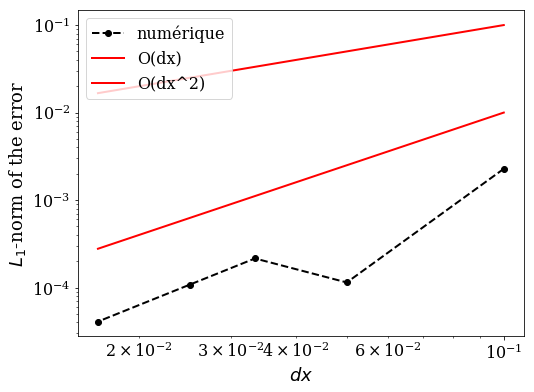

In [16]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'$dx$', fontsize=18)
pyplot.ylabel(r'$L_1$-norm of the error', fontsize=18)

pyplot.loglog(dx[:-1], error, color='k', ls='--', lw=2, marker='o',label="numérique");
pyplot.loglog(dx[:-1], dx[:-1]**2, color='r', ls='-', lw=2,label="O(dx)");
pyplot.loglog(dx[:-1], dx[:-1], color='r', ls='-', lw=2,label="O(dx^2)");
pyplot.legend(loc=2);
pyplot.grid()

In [17]:
alphas = numpy.empty(len(dx)-2)

for i in range(len(alphas)):
    
    alphas[i] = (numpy.log(error[i+1])-numpy.log(error[i]))\
        /(numpy.log(dx[i+1])-numpy.log(dx[i]))
    
print(alphas)

[ 4.31435035 -1.55830263  2.39457116  2.39773898]


Il est difficile de se convaincre que l'ordre de convergence de notre algorithme vaut bien 2. Néanmoins, il semble bien que celui-ci n'est pas inférieur à 2 et qu'aucune erreur d'ordre inférieur ne se soit propagée.

## Conclusions

<font color="red">  ** TODO **  </font>